# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
for city in cities:
    print(city)
# used to demonstrate for loops and print cities

san quintin
ushuaia
sinkat
rikitea
port hawkesbury
new norfolk
illoqqortoormiut
shingu
jinchang
vaini
hermanus
la rochelle
saskylakh
mataura
yelizovo
tumannyy
kamenka
lalmohan
caravelas
malanje
ahipara
kapaa
severo-kurilsk
axim
narsaq
albany
flin flon
lorengau
nikolskoye
fortuna
zhigansk
san cristobal
norman wells
lebu
nelson bay
gigmoto
cabo rojo
lasa
belushya guba
hamamatsu
gizo
hilo
adrar
mahibadhoo
nuuk
barrow
palabuhanratu
ust-ilimsk
puerto ayora
bardiyah
bemidji
amderma
bredasdorp
upernavik
hobart
tazovskiy
castro
bandarbeyla
busselton
matara
thompson
wellington
pisco
yakeshi
bengkulu
kawalu
phan thiet
vardo
noyabrsk
samarkand
mahebourg
bluff
kaitangata
kiunga
faanui
victoria
arraial do cabo
hithadhoo
puerto el triunfo
geraldton
umm lajj
tevaitoa
cape town
san isidro
tsihombe
banda aceh
barentsburg
jinka
ponta do sol
khatanga
andra
riverton
taolanaro
kodiak
punta arenas
zlatoustovsk
vila velha
lakes entrance
gat
yungay
enumclaw
bilibino
chokurdakh
mar del plata
lagoa
constitucion

In [4]:
#api.openweathermap.org/data/2.5/weather?q=Atlanta&appid=c1034ccd7af6a3b9dab48db651f430ce

In [5]:
print(weather_api_key)

c1034ccd7af6a3b9dab48db651f430ce


In [6]:
#initial code constructed and tested on one city
city = input("enter city name")
query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&units=imperial" + "&appid=" + weather_api_key
print(query_url)
response = requests.get(query_url)
api_response = response.json()
formatted_response = json.dumps(api_response,indent = 4)
print(formatted_response)

enter city nameLondon
http://api.openweathermap.org/data/2.5/weather?q=London&units=imperial&appid=c1034ccd7af6a3b9dab48db651f430ce
{
    "coord": {
        "lon": -0.1257,
        "lat": 51.5085
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 43.32,
        "feels_like": 36.45,
        "temp_min": 40.86,
        "temp_max": 45.52,
        "pressure": 1016,
        "humidity": 74
    },
    "visibility": 10000,
    "wind": {
        "speed": 13.8,
        "deg": 200
    },
    "clouds": {
        "all": 40
    },
    "dt": 1644698760,
    "sys": {
        "type": 2,
        "id": 2019646,
        "country": "GB",
        "sunrise": 1644650432,
        "sunset": 1644685748
    },
    "timezone": 0,
    "id": 2643743,
    "name": "London",
    "cod": 200
}


In [7]:
#defining the function to process the response from weather api and return only values needed
def process_response(api_response):
    coord_key = api_response['coord']
    lon = coord_key['lon']
    lat = coord_key['lat']
    main_key = api_response['main']
    temp_max = main_key['temp_max']
    humidity = main_key['humidity']
    wind_key = api_response['wind']
    speed = wind_key['speed']
    clouds_key = api_response['clouds']
    cloudiness = clouds_key ['all']
    sys_key = api_response['sys']
    country = sys_key['country']
    dt = api_response['dt']
    return(city,lat,lon,round(temp_max,2),humidity,cloudiness,round(speed,2),country,dt)

In [8]:
#part of debugging process
coord_key = api_response['coord']
coord_key
lon = coord_key['lon']
lat = coord_key['lat']
print(lon,lat)
main_key = api_response['main']
main_key 
temp_max = main_key['temp_max']
humidity = main_key['humidity']
print(temp_max,humidity)
wind_key = api_response['wind']
wind_key
speed = wind_key['speed']
speed
clouds_key = api_response['clouds']
clouds_key
cloudiness = clouds_key ['all']
sys_key = api_response['sys']
country = sys_key['country']
dt = api_response['dt']

-0.1257 51.5085
45.52 74


In [9]:
#Debugging.  testing one city.
process_response(api_response)

('London', 51.5085, -0.1257, 45.52, 74, 40, 13.8, 'GB', 1644698760)

In [10]:
#Made to process all cities
max_num = 525
city_num = 0
processed = 0
current_set = 1
current_record = 1
data = []

# time.sleep(60)
# City not found. Skipping...
# Processing Record 28 of Set 1 | kota bahru

while city_num < max_num:
    city = cities[processed]
    query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&units=imperial" + "&appid=" + weather_api_key
    response = requests.get(query_url)
    api_response = response.json()
    processed = processed + 1

    output_text = "Processing Record " + str(current_record) + " of Set " + str(current_set) + " | " + city
    print(output_text)
    #print(api_response['cod'])
    if api_response['cod'] == '404':
        print("City not found.  Skipping...") 
    else:    
        this_row = process_response(api_response)
        city_num = city_num + 1
        data.append(this_row)
        #print(this_row)

    current_record = current_record + 1
    if processed % 50 == 0:
        time.sleep(60)
        current_set = current_set + 1
        current_record = 1
        
#print(data)

Processing Record 1 of Set 1 | san quintin
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | sinkat
City not found.  Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | port hawkesbury
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | illoqqortoormiut
City not found.  Skipping...
Processing Record 8 of Set 1 | shingu
Processing Record 9 of Set 1 | jinchang
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | la rochelle
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | yelizovo
Processing Record 16 of Set 1 | tumannyy
City not found.  Skipping...
Processing Record 17 of Set 1 | kamenka
Processing Record 18 of Set 1 | lalmohan
Processing Record 19 of Set 1 | caravelas
Processing Record 20 of Set 1 | malanje
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | kapaa
Processing

Processing Record 37 of Set 4 | airai
Processing Record 38 of Set 4 | marcona
City not found.  Skipping...
Processing Record 39 of Set 4 | bambous virieux
Processing Record 40 of Set 4 | derzhavinsk
Processing Record 41 of Set 4 | fort nelson
Processing Record 42 of Set 4 | poum
Processing Record 43 of Set 4 | oromocto
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | tuktoyaktuk
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | foumban
Processing Record 49 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 50 of Set 4 | marsa matruh
Processing Record 1 of Set 5 | itarema
Processing Record 2 of Set 5 | black diamond
Processing Record 3 of Set 5 | cap malheureux
Processing Record 4 of Set 5 | berlevag
Processing Record 5 of Set 5 | araouane
Processing Record 6 of Set 5 | port hedland
Processing Record 7 of Set 5 | obera
Processing Record 8 of Set 5 | chilca
Processing Record 9 of Set 5 | paca

Processing Record 26 of Set 8 | san pedro
Processing Record 27 of Set 8 | great bend
Processing Record 28 of Set 8 | yeppoon
Processing Record 29 of Set 8 | kilmez
City not found.  Skipping...
Processing Record 30 of Set 8 | bilma
Processing Record 31 of Set 8 | qaqortoq
Processing Record 32 of Set 8 | camocim
Processing Record 33 of Set 8 | kerrville
Processing Record 34 of Set 8 | nanyamba
Processing Record 35 of Set 8 | saint-joseph
Processing Record 36 of Set 8 | tabas
Processing Record 37 of Set 8 | linqiong
Processing Record 38 of Set 8 | shakhtinsk
Processing Record 39 of Set 8 | kainantu
Processing Record 40 of Set 8 | chapais
Processing Record 41 of Set 8 | ust-bolsheretsk
City not found.  Skipping...
Processing Record 42 of Set 8 | samandag
Processing Record 43 of Set 8 | raga
Processing Record 44 of Set 8 | vila do maio
Processing Record 45 of Set 8 | andros
Processing Record 46 of Set 8 | kagadi
Processing Record 47 of Set 8 | uyemskiy
Processing Record 48 of Set 8 | chuy
P

Processing Record 14 of Set 12 | mujiayingzi
Processing Record 15 of Set 12 | naryan-mar
Processing Record 16 of Set 12 | erzin
Processing Record 17 of Set 12 | aparecida do taboado
Processing Record 18 of Set 12 | lambari
Processing Record 19 of Set 12 | vestmanna
Processing Record 20 of Set 12 | darnah
Processing Record 21 of Set 12 | padang
Processing Record 22 of Set 12 | caraquet
Processing Record 23 of Set 12 | monte aprazivel


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
df = pd.DataFrame(data, columns = ['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
df.head()
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san quintin,30.4833,-115.9500,75.06,29,74,7.72,MX,1644699245
1,ushuaia,-54.8000,-68.3000,47.86,53,40,42.57,AR,1644699205
2,rikitea,-23.1203,-134.9692,79.12,70,2,15.86,PF,1644699245
3,port hawkesbury,45.6169,-61.3485,49.95,87,75,12.66,CA,1644699246
4,new norfolk,-42.7826,147.0587,59.76,67,100,3.71,AU,1644699246


In [31]:
df.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
humid = df[df['Humidity'] > 100]
humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [15]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# No cities with greater than 100% humidity.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

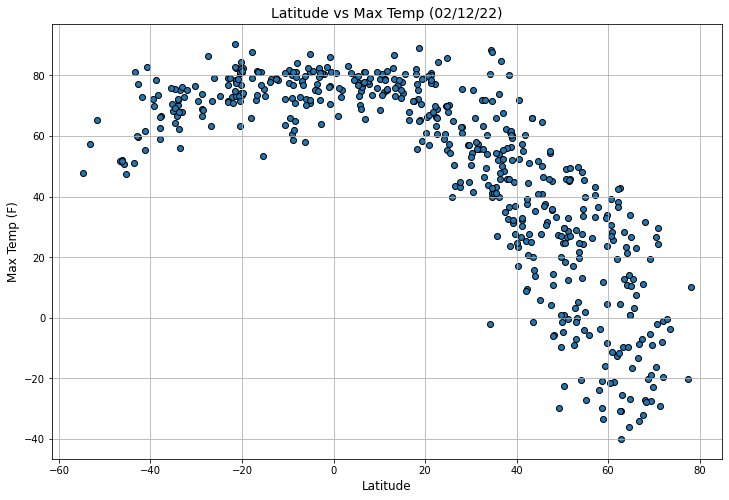

In [17]:
#variables
x = df['Lat']
y = df['Max Temp']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

#editing
plt.title('Latitude vs Max Temp (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Max Temp (F)',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig1.png")

Comments on Latitude and Temp:  clear evidence of warmer temps near equator

## Latitude vs. Humidity Plot

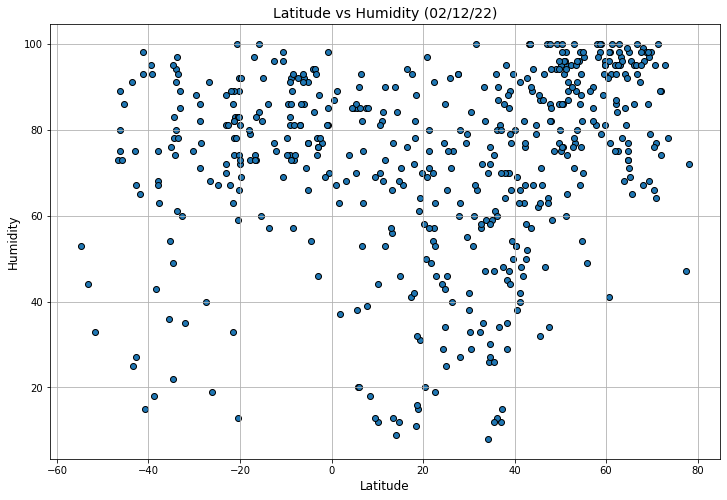

In [18]:
#variables
x = df['Lat']
y = df['Humidity']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

#editing
plt.title('Latitude vs Humidity (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Humidity',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig2.png")

Comments on Latitude and Humidity:  There are fewer cities in more arid locations.

## Latitude vs. Cloudiness Plot

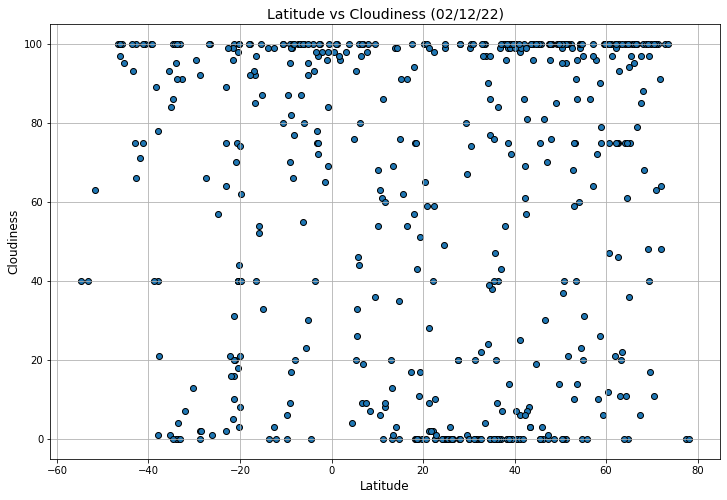

In [19]:
#variables
x = df['Lat']
y = df['Cloudiness']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

#editing
plt.title('Latitude vs Cloudiness (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Cloudiness',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig3.png")

Cloudiness runs from 0% to 100%. Cloudiness does not show similarities with latitude.
This is likely due to the atmospheric changes endemic to the planet.

## Latitude vs. Wind Speed Plot

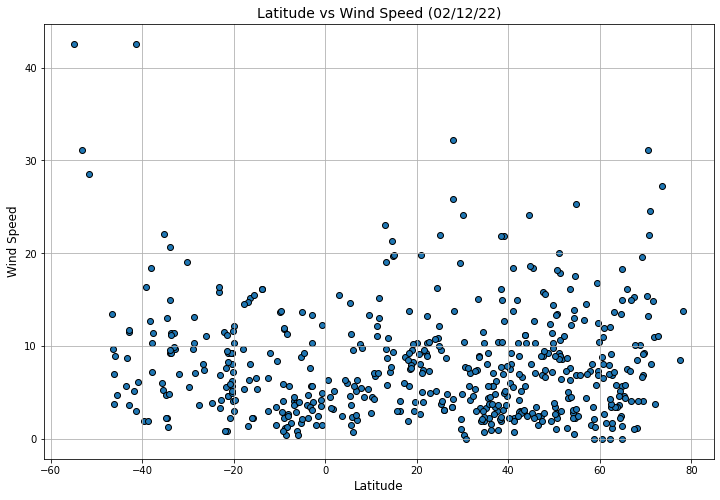

In [20]:
#variables
x = df['Lat']
y = df['Wind Speed']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

#editing
plt.title('Latitude vs Wind Speed (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Wind Speed',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig4.png")

Similar to cloudiness, wind speed is highly variable and typically blows 
at moderate speeds. There are also some locations that appear to experience 
greater speeds. The lack of many cities makes since given the great 
discomfort of high speeds.  

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8292253366204514


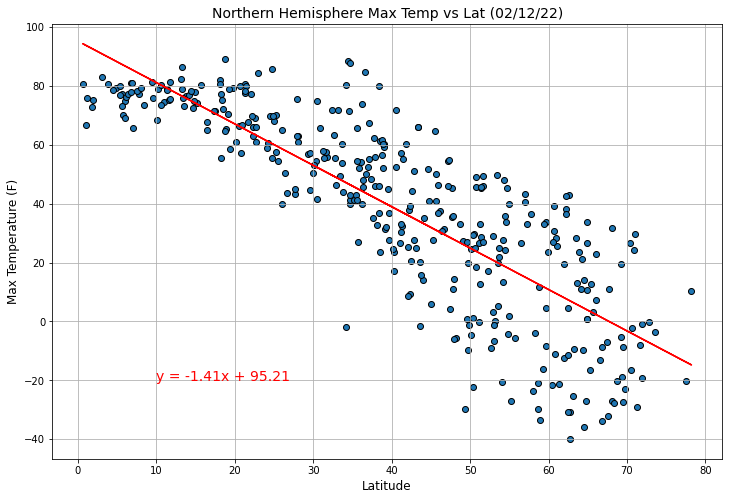

In [21]:
#variables 
north_hem = df.loc[df["Lat"] > 0]
south_hem = df.loc[df["Lat"] < 0]
x = north_hem['Lat']
y = north_hem['Max Temp']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
print("The r-value is: " + str(rvalue))

plt.plot(x , regress , "r-")
regline = "y = " + str(round(slope , 2)) + "x + " + str(round(intercept , 2))
plt.annotate(regline , (10 , -20) , fontsize = 14 , color = "red")

#Editing
plt.title('Northern Hemisphere Max Temp vs Lat (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Max Temperature (F)',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5266907919464644


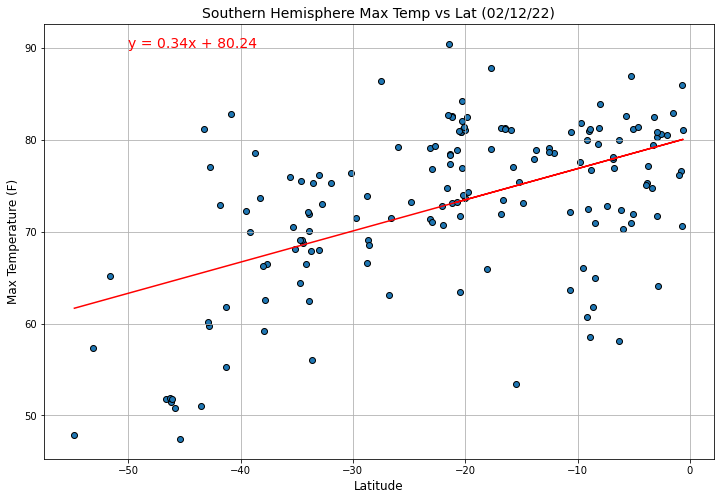

In [22]:
#variables 
north_hem = df.loc[df["Lat"] > 0]
south_hem = df.loc[df["Lat"] < 0]
x = south_hem['Lat']
y = south_hem['Max Temp']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
print("The r-value is: " + str(rvalue))

plt.plot(x , regress , "r-")
regline = "y = " + str(round(slope , 2)) + "x + " + str(round(intercept , 2))
plt.annotate(regline , (-50 , 90) , fontsize = 14 , color = "red")

#Editing
plt.title('Southern Hemisphere Max Temp vs Lat (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Max Temperature (F)',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig6.png")

The Northern Hemisphere correlation above is consistent with a 
tight regression given the predictable maximum temperature 
changes.  As the latitude of either hemisphere, the cities decline. 
The Southern correlation does not appear as strong as the Northern.  
I suspect that geographic features such as the larger landmasses 
in the North relative to the more oceanic size in the South.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4345368897702875


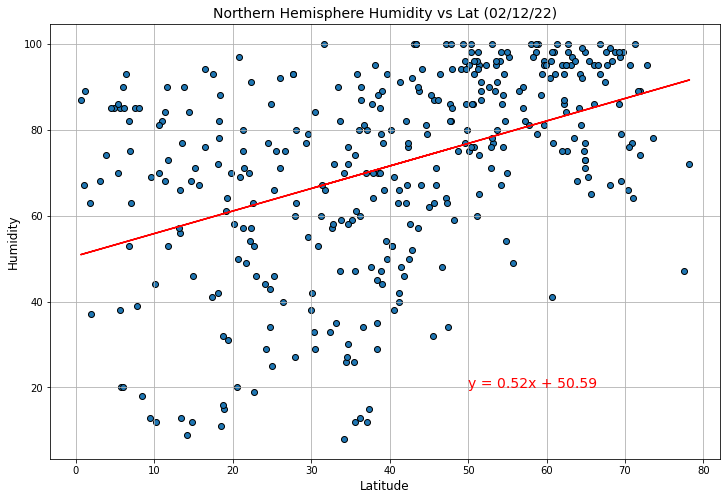

In [23]:
#variables 
north_hem = df.loc[df["Lat"] > 0]
south_hem = df.loc[df["Lat"] < 0]
x = north_hem['Lat']
y = north_hem['Humidity']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
print("The r-value is: " + str(rvalue))

plt.plot(x , regress , "r-")
regline = "y = " + str(round(slope , 2)) + "x + " + str(round(intercept , 2))
plt.annotate(regline , (50 , 20) , fontsize = 14 , color = "red")

#Editing
plt.title('Northern Hemisphere Humidity vs Lat (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Humidity',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig7.png")

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.30845558798370126


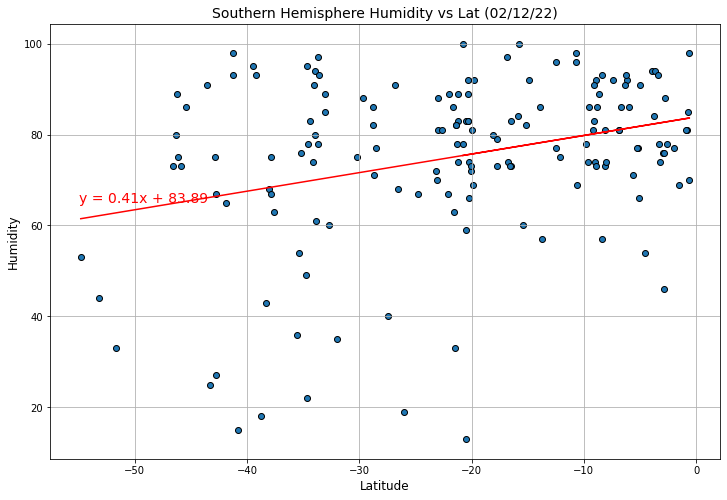

In [24]:
#variables 
north_hem = df.loc[df["Lat"] > 0]
south_hem = df.loc[df["Lat"] < 0]
x = south_hem['Lat']
y = south_hem['Humidity']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
print("The r-value is: " + str(rvalue))

plt.plot(x , regress , "r-")
regline = "y = " + str(round(slope , 2)) + "x + " + str(round(intercept , 2))
plt.annotate(regline , (-55 , 65) , fontsize = 14 , color = "red")

#Editing
plt.title('Southern Hemisphere Humidity vs Lat (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Humidity',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig8.png")

Moving South away from the equator, the humidity decreases. The same 
occurs in the Northern Hemisphere but to a lesser degree. As mentioned 
in the previous map pairs, the Southern Hemisphere's greater oceanic 
influence decreases the changes noted in the North.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22424745069673796


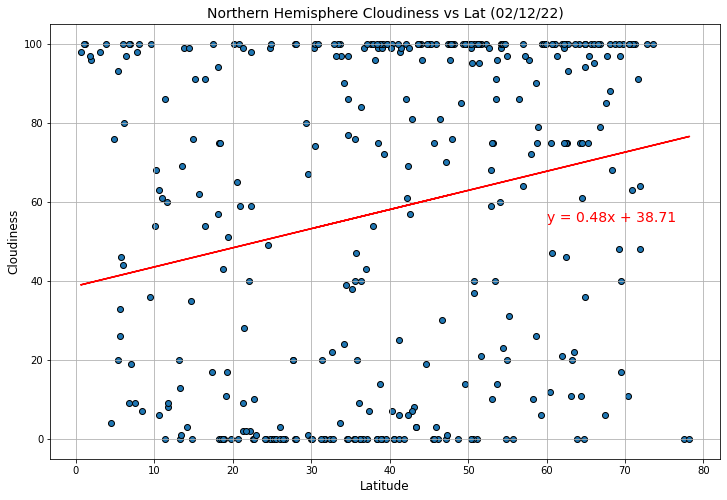

In [25]:
#variables 
north_hem = df.loc[df["Lat"] > 0]
south_hem = df.loc[df["Lat"] < 0]
x = north_hem['Lat']
y = north_hem['Cloudiness']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
print("The r-value is: " + str(rvalue))

plt.plot(x , regress , "r-")
regline = "y = " + str(round(slope , 2)) + "x + " + str(round(intercept , 2))
plt.annotate(regline , (60 , 55) , fontsize = 14 , color = "red")

#Editing
plt.title('Northern Hemisphere Cloudiness vs Lat (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Cloudiness',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05705178591825424


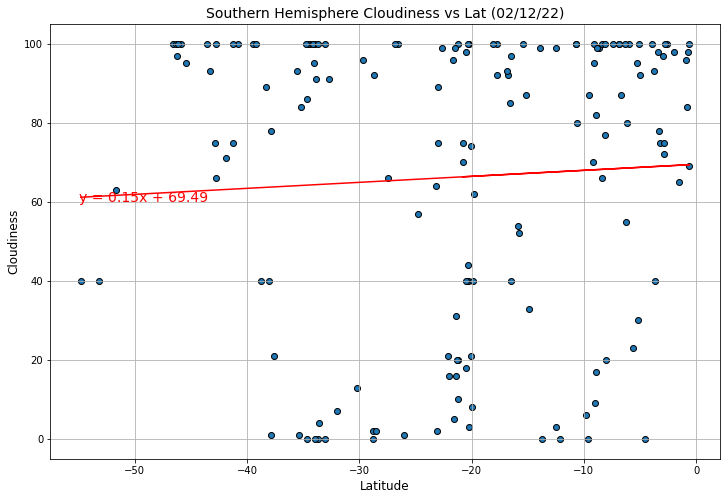

In [26]:
#variables 
north_hem = df.loc[df["Lat"] > 0]
south_hem = df.loc[df["Lat"] < 0]
x = south_hem['Lat']
y = south_hem['Cloudiness']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
print("The r-value is: " + str(rvalue))

plt.plot(x , regress , "r-")
regline = "y = " + str(round(slope , 2)) + "x + " + str(round(intercept , 2))
plt.annotate(regline , (-55 , 60) , fontsize = 14 , color = "red")

#Editing
plt.title('Southern Hemisphere Cloudiness vs Lat (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Cloudiness',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig10.png")

The measure of cloudiness does not reveal strong consistency given 
the volatile nature of the atmosphere.  The measure of cloudiness 
correlation is quite weak.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04518202226313903


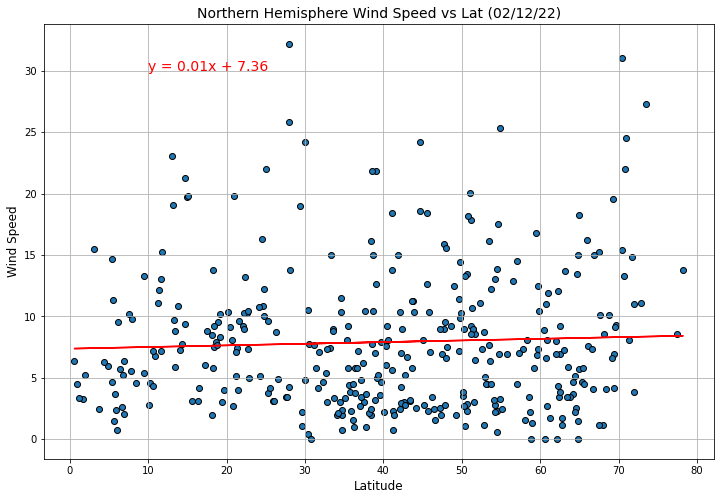

In [27]:
#variables 
north_hem = df.loc[df["Lat"] > 0]
south_hem = df.loc[df["Lat"] < 0]
x = north_hem['Lat']
y = north_hem['Wind Speed']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
print("The r-value is: " + str(rvalue))

plt.plot(x , regress , "r-")
regline = "y = " + str(round(slope , 2)) + "x + " + str(round(intercept , 2))
plt.annotate(regline , (10 , 30) , fontsize = 14 , color = "red")

#Editing
plt.title('Northern Hemisphere Wind Speed vs Lat (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Wind Speed',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.4158388851714599


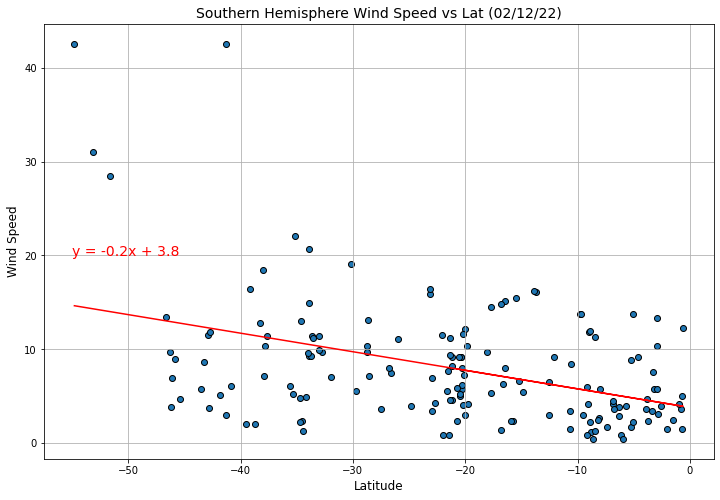

In [28]:
#variables 
north_hem = df.loc[df["Lat"] > 0]
south_hem = df.loc[df["Lat"] < 0]
x = south_hem['Lat']
y = south_hem['Wind Speed']

#Plotting
plt.figure(figsize = (12, 8))
plt.scatter(x, y, edgecolor = "black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
print("The r-value is: " + str(rvalue))

plt.plot(x , regress , "r-")
regline = "y = " + str(round(slope , 2)) + "x + " + str(round(intercept , 2))
plt.annotate(regline , (-55 , 20) , fontsize = 14 , color = "red")

#Editing
plt.title('Southern Hemisphere Wind Speed vs Lat (%s)' % time.strftime ('%x'), size=14)
plt.xlabel('Latitude', size = 12)
plt.ylabel('Wind Speed',  size = 12)
plt.grid(True)
plt.show
plt.savefig("output_data/fig12.png")

The correlation shows no significant relationship exists for 
wind speed and latitude for either the Northern or Southern
Hemisphere.  We do see a consistent preference for relatively light
wind speeds.